<a href="https://colab.research.google.com/github/LuciaBossio/Data-Science-II-Entrega-Garcia-Bossio/blob/main/ProyectoDSII%2BGarcia_Bossio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Entrega I García Bossio

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3.csv to Ventas_tienda Bossio V3.csv


In [9]:
import pandas as pd
df=pd.read_csv('Ventas_tienda Bossio V3.csv', sep=';', encoding='latin-1')
df.head()
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#print=df

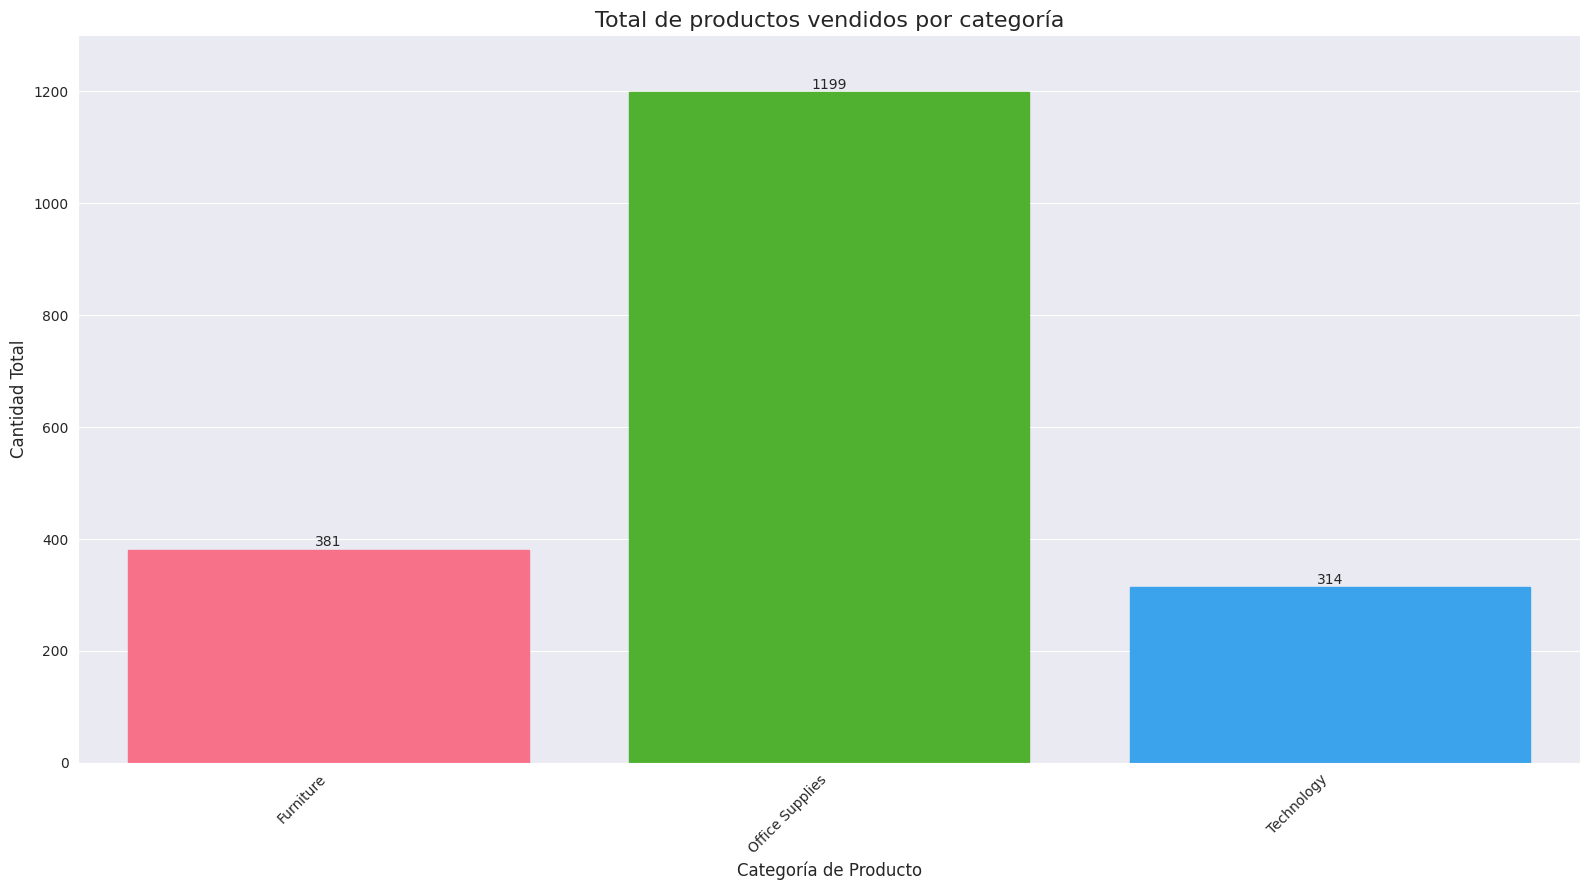

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_agrupado = df.groupby('categoria_producto')['cantidad'].sum().reset_index()


plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")

ax = sns.barplot(x='categoria_producto', y='cantidad', data=df_agrupado, errorbar=None)


colors = sns.color_palette("husl", len(ax.patches))
for patch, color in zip(ax.patches, colors):
    patch.set_color(color)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)


ax.set_ylim(0, 1300)


plt.title('Total de productos vendidos por categoría', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Cantidad Total', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [13]:
# Define features (X) and target (y)
X = df.drop('total_venta', axis=1)
y = df['total_venta']

# Identify categorical and numerical features
categorical_features = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create pipelines for Linear Regression and Decision Tree Regression models
linear_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('regressor', LinearRegression())])

decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', DecisionTreeRegressor(random_state=42))])

# Define cross-validation strategy
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for Linear Regression
lr_cv_results = cross_validate(linear_regression_pipeline, X, y, cv=cv_strategy,
                               scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'))

# Perform cross-validation for Decision Tree Regression
dt_cv_results = cross_validate(decision_tree_pipeline, X, y, cv=cv_strategy,
                               scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'))

# Print results
print("Linear Regression Cross-Validation Results:")
print("Mean MSE:", -lr_cv_results['test_neg_mean_squared_error'].mean())
print("Mean MAE:", -lr_cv_results['test_neg_mean_absolute_error'].mean())
print("Mean R2:", lr_cv_results['test_r2'].mean())

print("\nDecision Tree Regression Cross-Validation Results:")
print("Mean MSE:", -dt_cv_results['test_neg_mean_squared_error'].mean())
print("Mean MAE:", -dt_cv_results['test_neg_mean_absolute_error'].mean())
print("Mean R2:", dt_cv_results['test_r2'].mean())

Linear Regression Cross-Validation Results:
Mean MSE: 69133.34574362295
Mean MAE: 135.82787647125951
Mean R2: 0.8258107875217344

Decision Tree Regression Cross-Validation Results:
Mean MSE: 92973.71599999999
Mean MAE: 67.50800000000001
Mean R2: 0.8103581565290178


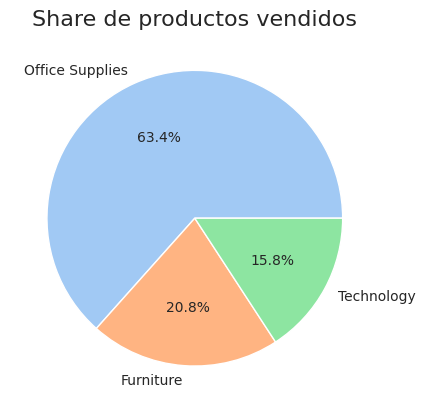

In [14]:
data = df['categoria_producto'].value_counts()
labels=data.index
colors = sns.color_palette("pastel")
plt.pie(data, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Share de productos vendidos', fontsize=16)
plt.show()

In [15]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], format='%d/%m/%Y', dayfirst=True)

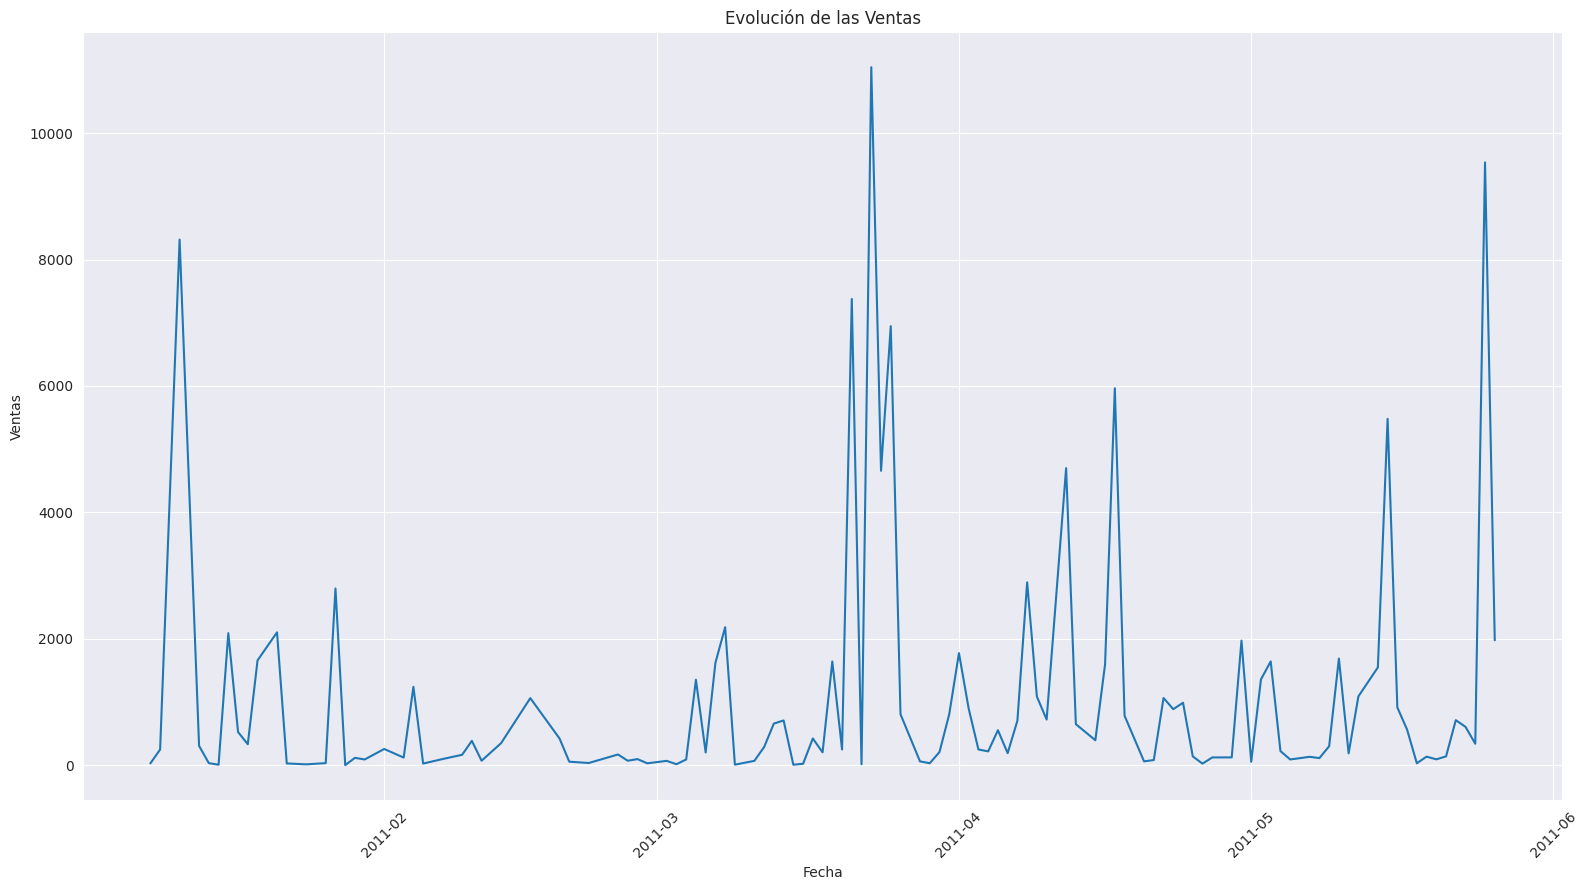

In [16]:
sales_over_time = df.groupby('fecha_venta')['total_venta'].sum()

plt.figure(figsize=(16, 9))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title('Evolución de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Método de feature selection para reducir la dimensionalidad del dataset**

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3.csv to Ventas_tienda Bossio V3 (1).csv


In [19]:
import pandas as pd
data = pd.read_csv('Ventas_tienda Bossio V3 (1).csv', encoding='latin-1', sep=';')

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import io

In [21]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [22]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [23]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [24]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

print("Forma de X después de la división:", X.shape)
print("Forma de y después de la división:", y.shape)

Forma de X después de la división: (500, 9)
Forma de y después de la división: (500,)


In [25]:
print("Forma de X después de limpiar NaN:", X.shape)
print("Forma de y después de limpiar NaN:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X después de limpiar NaN: (500, 9)
Forma de y después de limpiar NaN: (500,)
Forma de X_train: (350, 9)
Forma de X_test: (150, 9)


In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
importances = model.feature_importances_

In [28]:
feature_importances = pd.Series(importances, index=X.columns)
print("Importancia de las características:")
print(feature_importances.sort_values(ascending=False))

Importancia de las características:
precio_unitario       0.923378
cantidad              0.034362
nombre_producto       0.011454
nombre_cliente        0.009426
id_venta              0.008124
fecha_venta           0.004932
id_producto           0.003749
id_cliente            0.003599
categoria_producto    0.000976
dtype: float64


**Algoritmo de regresión o clasificación para entrenar con los datos elegidos**

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import io

In [32]:
data = pd.read_csv('Ventas_tienda Bossio V3 (1).csv', encoding='latin-1', sep=';')

In [33]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())

In [34]:
categorical_cols = ['nombre_producto', 'categoria_producto', 'nombre_cliente','id_producto','id_cliente']
for col in categorical_cols:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [35]:
data['fecha_venta'] = pd.to_datetime(data['fecha_venta'], format='%d/%m/%Y').astype(int) // 10**9

In [36]:
X = data.drop('total_venta', axis=1, errors='ignore')
y = data['total_venta'] if 'total_venta' in data.columns else None

if y is None:
    print("Error: La columna 'total_venta' no se encuentra en el dataset.")
    exit()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

MSE: 75786.629044
MAE: 53.72453333333333
R2: 0.8849787956189801


In [40]:
# Redefine the built-in print function
import builtins
print = builtins.print

**Unificar BDD**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Ventas_tienda Bossio V3-BASE 2.csv to Ventas_tienda Bossio V3-BASE 2.csv


In [ ]:
import pandas as pd
df=pd.read_csv('Ventas_tienda Bossio V3-BASE 2.csv', sep=';', encoding='latin-1')

In [ ]:
import pandas as pd
df_ventas = pd.read_csv('Ventas_tienda Bossio V3.csv', encoding='latin-1', sep=';')
df_base = pd.read_csv('Ventas_tienda Bossio V3-BASE 2.csv', encoding='latin-1', sep=';')
df_fusionado = pd.merge(df_ventas, df_base, on='id_cliente', how='inner')  # Solo filas en común
df_fusionado.to_csv('Ventas_fusionado.csv', index=False, sep=';')

/tmp/ipython-input-1617394298.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="tipo_cliente", y="total_venta", data=df_fusionado, ci=None)


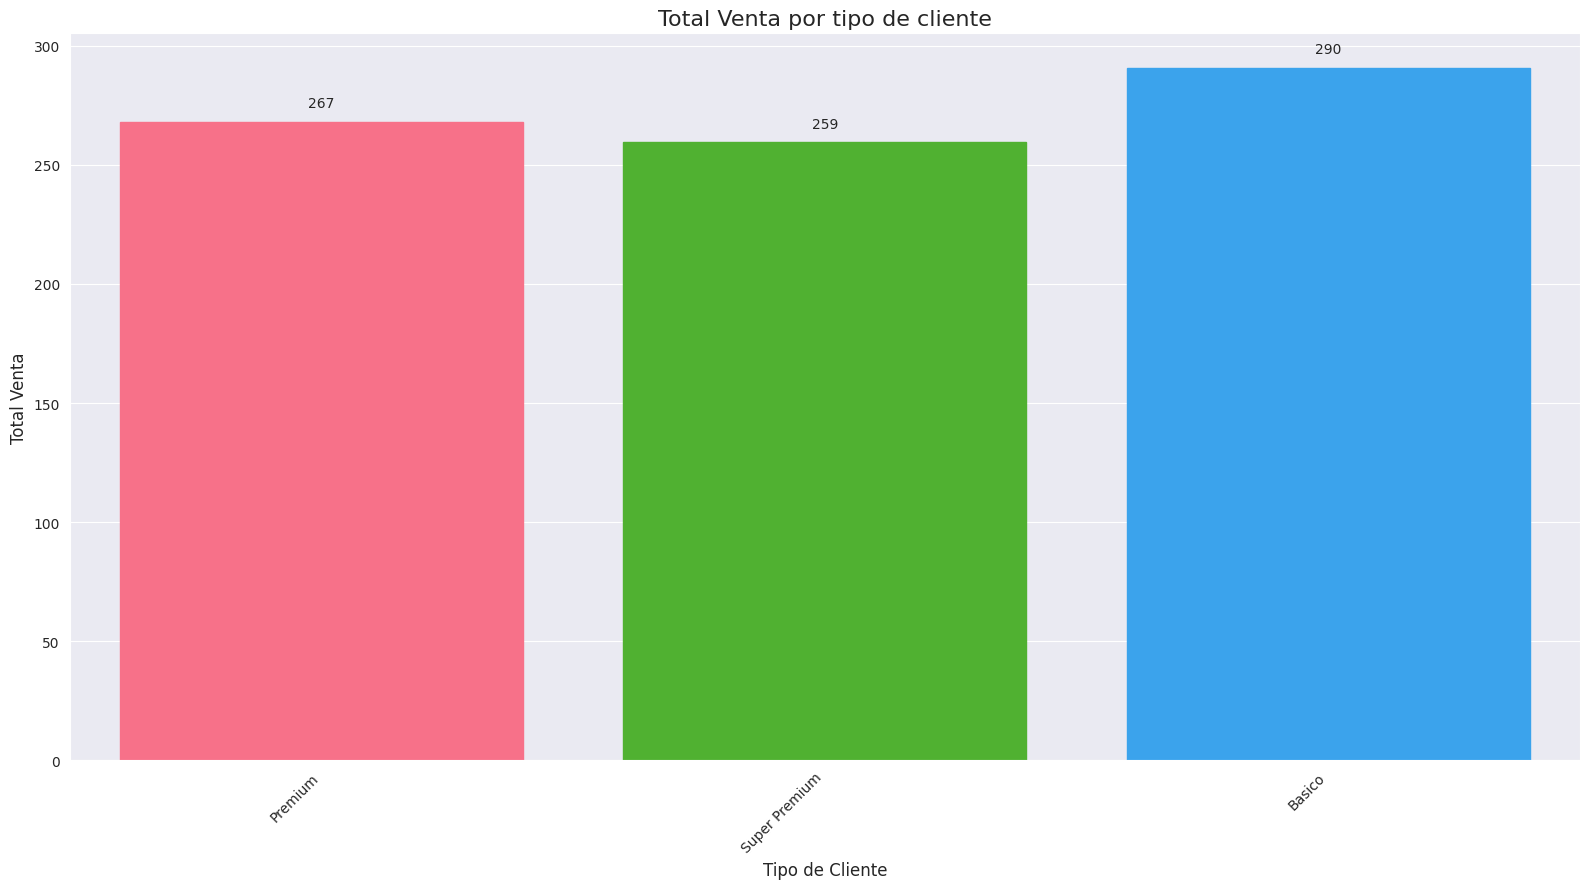

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")
ax = sns.barplot(x="tipo_cliente", y="total_venta", data=df_fusionado, ci=None)
colors = sns.color_palette("husl", len(ax.patches))
for patch, color in zip(ax.patches, colors):
    patch.set_color(color)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}',
            ha='center', va='bottom', fontsize=10)
plt.title('Total Venta por tipo de cliente', fontsize=16)
plt.xlabel('Tipo de Cliente', fontsize=12)
plt.ylabel('Total Venta', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Análisis univariado**

In [ ]:
df_base = pd.read_csv('Ventas_fusionado.csv', encoding='latin-1', sep=';')
media = df_base['total_venta'].mean()
mediana = df_base['total_venta'].median()
moda = df_base['total_venta'].mode()[0]
print(f"Media de total_venta: {media}")
print(f"Mediana de total_venta: {mediana}")
print(f"Moda de total_venta: {moda}")

Media de total_venta: 272.6736111111111
Mediana de total_venta: 42.0
Moda de total_venta: 2


In [ ]:
df_base = pd.read_csv('Ventas_fusionado.csv', encoding='latin-1', sep=';')
media = df_base['cantidad'].mean()
mediana = df_base['cantidad'].median()
moda = df_base['cantidad'].mode()[0]
print(f"Media de cantidad: {media}")
print(f"Mediana de cantidad: {mediana}")
print(f"Moda de cantidad: {moda}")

Media de cantidad: 3.7974537037037037
Mediana de cantidad: 3.0
Moda de cantidad: 3


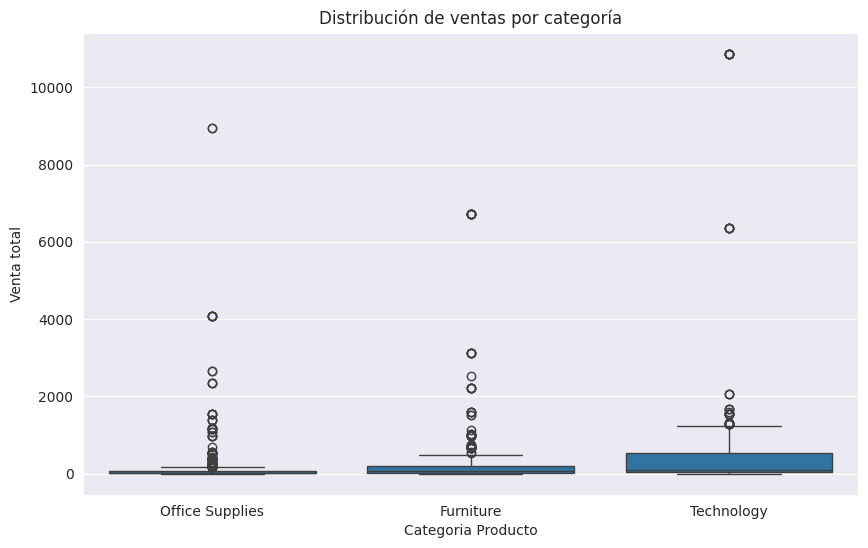

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.boxplot(x='categoria_producto', y='total_venta', data=df_base)
plt.title('Distribución de ventas por categoría')
plt.xlabel('Categoria Producto')
plt.ylabel('Venta total')
plt.show()

**Análisis bivariado**

In [ ]:
import pandas as pd
df_cliente = df_ventas.groupby('id_cliente')['cantidad'].sum().reset_index()
df_cliente_tipo = df_base[['id_cliente', 'tipo_cliente']].drop_duplicates()
df_merged = pd.merge(df_cliente, df_cliente_tipo, on='id_cliente', how='left')

In [ ]:
df_merged['tipo_cliente_num'] = df_merged['tipo_cliente'].astype('category').cat.codes
coeficiente = df_merged['tipo_cliente_num'].corr(df_merged['cantidad'], method='pearson')
print(f'Coeficiente de Pearson entre tipo_cliente y cantidad vendida: {coeficiente}')


Coeficiente de Pearson entre tipo_cliente y cantidad vendida: 0.009694080263321338


In [ ]:
import pandas as pd
df_agrupado = df_fusionado.groupby('categoria_producto')['total_venta'].sum().reset_index()
df_agrupado['categoria_num'] = df_agrupado['categoria_producto'].astype('category').cat.codes
coeficiente = df_agrupado['categoria_num'].corr(df_agrupado['total_venta'], method='pearson')
print(f'Coeficiente de Pearson entre categoría de producto y total de venta: {coeficiente}')

Coeficiente de Pearson entre categoría de producto y total de venta: 0.8859296167860901


In [ ]:
import pandas as pd
import plotly.express as px
df_agrupado = df_fusionado.groupby('categoria_producto')['total_venta'].sum().reset_index()
fig = px.scatter(
    df_agrupado,
    x='categoria_producto',
    y='total_venta',
    title='Dispersión entre Categoría de Producto y Total de Ventas',
    labels={'categoria_producto': 'Categoría de Producto', 'total_venta': 'Total de Ventas'}
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

**Análisis de regresión multivariada**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_fusionado[['cantidad', 'categoria_producto']]
X = pd.get_dummies(X, columns=['categoria_producto'], drop_first=True)
y = df_fusionado['total_venta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coeficientes = pd.Series(model.coef_, index=X.columns)
print("Coeficientes del modelo:\n", coeficientes)

Coeficientes del modelo:
 cantidad                              123.280410
categoria_producto_Office Supplies   -251.764248
categoria_producto_Technology         255.071432
dtype: float64


**Entrenamiento y testeo (modelo regresión lineal vs árbol de decisión y validación cruzada k-fold)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [43]:
path = "Ventas_tienda Bossio V3.csv"
df = pd.read_csv(path, sep=';', encoding='latin-1')

In [44]:
cols_drop = ['id_venta', 'id_cliente', 'id_producto',
              'nombre_producto', 'nombre_cliente']
X = df.drop(columns=cols_drop + ['total_venta'])
y = df['total_venta']

In [46]:
for col in X.select_dtypes(include=['object']).columns:
    top_vals = X[col].value_counts().nlargest(20).index
    X[col] = np.where(X[col].isin(top_vals), X[col], "__otros__")
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preproc = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
], remainder='drop')

In [47]:
lr = Pipeline([('preproc', preproc), ('model', LinearRegression())])
dt = Pipeline([('preproc', preproc), ('model', DecisionTreeRegressor(random_state=42))])

In [48]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}
print("Entrenando modelos (k=3 folds)...")
res_lr = cross_validate(lr, X, y, cv=kf, scoring=scoring, return_train_score=False)
res_dt = cross_validate(dt, X, y, cv=kf, scoring=scoring, return_train_score=False)

Entrenando modelos (k=3 folds)...


In [49]:
def summarize_results(res, name):
    mse_vals = -res['test_neg_mean_squared_error']
    rmse_vals = np.sqrt(mse_vals)
    mae_vals = -res['test_neg_mean_absolute_error']
    r2_vals = res['test_r2']
    summary = pd.DataFrame({
        'metric': ['RMSE', 'MAE', 'R2'],
        'mean': [rmse_vals.mean(), mae_vals.mean(), r2_vals.mean()],
        'std': [rmse_vals.std(), mae_vals.std(), r2_vals.std()]
    })
    summary['model'] = name
    return summary

In [50]:
summary_lr = summarize_results(res_lr, "Linear Regression")
summary_dt = summarize_results(res_dt, "Decision Tree")

summary_all = pd.concat([summary_lr, summary_dt], ignore_index=True)
print("\n📊 RESULTADOS PROMEDIO (3 folds):")
print(summary_all)


📊 RESULTADOS PROMEDIO (3 folds):
  metric        mean         std              model
0   RMSE  214.496830   29.773639  Linear Regression
1    MAE  116.541659    4.337738  Linear Regression
2     R2    0.930717    0.026831  Linear Regression
3   RMSE  344.174495  116.174077      Decision Tree
4    MAE   64.259257   14.116465      Decision Tree
5     R2    0.807841    0.134914      Decision Tree


**RandomizedSearchCV para optimizar el Árbol de Decisión**

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import randint

In [52]:
cols_drop = ['id_venta', 'id_cliente', 'id_producto', 'nombre_producto', 'nombre_cliente']
X = df.drop(columns=cols_drop + ['total_venta'])
y = df['total_venta']

In [53]:
for col in X.select_dtypes(include=['object']).columns:
    top_vals = X[col].value_counts().nlargest(20).index
    X[col] = np.where(X[col].isin(top_vals), X[col], "__otros__")

In [55]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='__missing__')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preproc = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

dt = DecisionTreeRegressor(random_state=42)

In [56]:
param_dist = {
    'model__max_depth': randint(2, 20),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10),
    'model__max_features': ['auto', 'sqrt', 'log2', None]
}


pipe = Pipeline([
    ('preproc', preproc),
    ('model', dt)
])


kf = KFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='r2',
    cv=kf,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [57]:
print("Buscando mejores hiperparámetros...")
search.fit(X, y)

print("\n📊 Mejor combinación de hiperparámetros encontrada:")
print(search.best_params_)

print("\n🔹 Mejor R² promedio obtenido en validación cruzada:")
print(round(search.best_score_, 4))


Buscando mejores hiperparámetros...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

📊 Mejor combinación de hiperparámetros encontrada:
{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 3}

🔹 Mejor R² promedio obtenido en validación cruzada:
0.8727


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

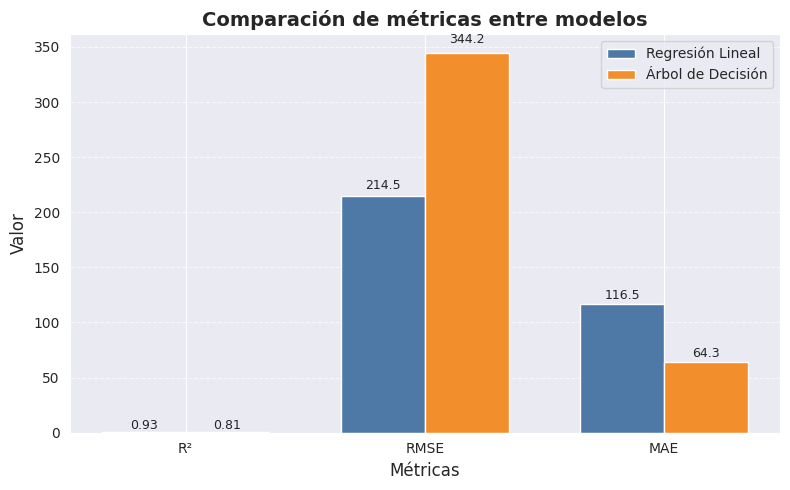

In [58]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["R²", "RMSE", "MAE"]

linear_regression = [0.93, 214.5, 116.5]
decision_tree = [0.81, 344.2, 64.3]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
bars1 = plt.bar(x - width/2, linear_regression, width, label="Regresión Lineal", color="#4E79A7")
bars2 = plt.bar(x + width/2, decision_tree, width, label="Árbol de Decisión", color="#F28E2B")

plt.xlabel("Métricas", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.title("Comparación de métricas entre modelos", fontsize=14, fontweight="bold")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval,
                 round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()